In [18]:
import time
import requests 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**Used Copilot to help construct the following functions**

In [2]:
def get_steam_reviews(appid):
    """
    Fetches game reviews from Steam API for a given appid.
    
    Parameters:
    appid (int): The Steam AppID of the game
    
    Returns:
    tuple: (games_df)
        - games_df: DataFrame containing individual reviews
    """
    # Construct API URL
    url = f'http://store.steampowered.com/appreviews/{appid}?json=1'
    
    try:
        # Get response from API
        response = requests.get(url).json()
        games = response['reviews']
        games_summary = response['query_summary']
        
        # Process individual reviews
        game_data = []
        for game in games:
            game_data.append({
                'game_id': str(appid),  # Using appid as game_title since we don't fetch the title
                'recommendationid': game['recommendationid'],
                'review': game['review'],
            })
            time.sleep(1)
        
        
        
        # Create DataFrames
        games_df = pd.DataFrame(game_data)
        
        return games_df
    
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

In [3]:
def get_steam_summaries(appid):
    """
    Fetches summary statistics from Steam API for a given appid.
    
    Parameters:
    appid (int): The Steam AppID of the game
    
    Returns:
    tuple: (games_summary_df)
        - games_summary_df: DataFrame containing summary statistics
    """
    # Construct API URL
    url = f'http://store.steampowered.com/appreviews/{appid}?json=1'
    
    try:
        # Get response from API
        response = requests.get(url).json()
        games = response['reviews']
        games_summary = response['query_summary'] 

        game_summary_data = [{
            'game_id': str(appid),
            'total_reviews': games_summary['total_reviews'],
            'total_positive': games_summary['total_positive'],
            'total_negative': games_summary['total_negative'],
            'review_score': games_summary['review_score'],
            'review_score_desc': games_summary['review_score_desc'],
        }]
        time.sleep(1)
        
        # Create DataFrames
        games_summary_df = pd.DataFrame(game_summary_data)
        
        return games_summary_df
    
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None

In [14]:
def get_multiple_steam_summaries(app_ids):
    """
    Fetches summary statistics from Steam API for multiple app IDs.
    
    Parameters:
    app_ids (list): List of Steam AppIDs of the games
    
    Returns:
    pandas.DataFrame: DataFrame containing summary statistics for all games
    """
    all_summaries = []
    
    for appid in app_ids:
        # Construct API URL
        url = f'http://store.steampowered.com/appreviews/{appid}?json=1'
        
        try:
            # Get response from API
            response = requests.get(url).json()
            games_summary = response['query_summary']

            game_summary_data = {
                'game_id': str(appid),
                'total_reviews': games_summary['total_reviews'],
                'total_positive': games_summary['total_positive'],
                'total_negative': games_summary['total_negative'],
                'review_score': games_summary['review_score'],
                'review_score_desc': games_summary['review_score_desc'],
            }
            
            all_summaries.append(game_summary_data)
            time.sleep(1)  # Maintain sleep to respect rate limits
            
        except Exception as e:
            print(f"An error occurred for app ID {appid}: {e}")
            continue
    
    # Create DataFrame from all summaries
    if all_summaries:
        games_summary_df = pd.DataFrame(all_summaries)
        return games_summary_df
    else:
        return None

In [4]:
from tqdm import tqdm

def get_multiple_steam_reviews(appid_list):
    """
    Fetches reviews for multiple Steam games and combines them into a single DataFrame.
    
    Parameters:
    appid_list (list): List of Steam AppIDs
    
    Returns:
    DataFrame: Combined DataFrame containing reviews for all games
    """
    # Initialize an empty list to store all game reviews
    all_reviews = []
    
    # Process each game ID with a progress bar
    for appid in tqdm(appid_list, desc="Processing games"):
        # Get reviews for current game
        game_reviews = get_steam_reviews(appid)
        
        if game_reviews is not None:
            # Add to our collection
            all_reviews.append(game_reviews)
            
            # Add a delay to be nice to Steam's API
            time.sleep(2)
        else:
            print(f"Skipping AppID {appid} due to error")
    
    # Combine all reviews into a single DataFrame
    if all_reviews:
        combined_df = pd.concat(all_reviews, ignore_index=True)
        return combined_df
    else:
        return pd.DataFrame()  # Return empty DataFrame if no reviews were collected

In [8]:
df2 = pd.read_csv('steam_reviews.csv') 
df2.head(21) 


,game_title,appid,recommendationid,review,cleaned_reviews,sentiment
0,Rust,252490,177409644,Rust is a great game. It is like real life if ...,rust is a great game it is like real life if t...,NEU
1,Rust,252490,177619447,This game makes me want to kill myself. It's s...,this game makes me want to kill myself its so ...,NEG
2,Rust,252490,178793028,"Great game very unique and grindy, which I per...",great game very unique and grindy which i pers...,POS
3,Rust,252490,177844978,[h1]My [i]Rust[/i] Review - 223 Hours In[/h1]\...,hmy irusti review hours inh bratingb hour...,NEG
4,Rust,252490,178578421,"Great fun, very addictive and highly toxic... ...",great fun very addictive and highly toxic prep...,NEG
5,Rust,252490,177383935,game is horrible. toxic community and the supp...,game is horrible toxic community and the suppo...,NEG
6,Rust,252490,177862501,fucking ass. wont let me in the game because i...,fucking ass wont let me in the game because it...,NEG
7,Rust,252490,178818993,This game has ruined my life. Every aspect of ...,this game has ruined my life every aspect of i...,NEG
8,Rust,252490,177563743,its the most unfair game and company i have ev...,its the most unfair game and company i have ev...,NEG
9,Rust,252490,178578300,New update is literally survive the wolves sim...,new update is literally survive the wolves sim...,NEG


In [9]:
unique_app_ids = df2['appid'].unique().tolist()  
unique_app_ids

[252490,
 271590,
 2933620,
 20590,
 359550,
 2669320,
 2357570,
 570,
 1172470,
 10,
 381210,
 1962663,
 578080,
 1147860,
 513790,
 455230,
 594650,
 2050650,
 252950,
 1245620,
 297000,
 1203620,
 1158310,
 1364780,
 739630,
 2429640,
 2124490,
 238960,
 1085660,
 1343370,
 2620,
 582660,
 1426300,
 221100,
 1240440,
 1174180,
 2366980,
 761890,
 427520,
 2668510,
 1063730,
 2878980,
 3070070,
 3146520,
 1407200,
 438100,
 1272080,
 39210,
 1845910,
 2688950,
 1818450,
 268050,
 1599340,
 552990,
 2344520,
 1778820,
 254300]

In [15]:
summaries_df = get_multiple_steam_summaries(unique_app_ids) 
summaries_df.to_csv('steam_summaries.csv', index=False)

In [19]:
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text   

df2['cleaned_reviews'] = df2['review'].apply(clean) 
df2.head()

,game_title,appid,recommendationid,review,cleaned_reviews
0,Rust,252490,177409644,Rust is a great game. It is like real life if ...,rust is a great game it is like real life if t...
1,Rust,252490,177619447,This game makes me want to kill myself. It's s...,this game makes me want to kill myself its so ...
2,Rust,252490,178793028,"Great game very unique and grindy, which I per...",great game very unique and grindy which i pers...
3,Rust,252490,177844978,[h1]My [i]Rust[/i] Review - 223 Hours In[/h1]\...,hmy irusti review hours inh bratingb hour...
4,Rust,252490,178578421,"Great fun, very addictive and highly toxic... ...",great fun very addictive and highly toxic prep...


In [22]:
# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at finiteautomata/bertweet-base-sentiment-analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [26]:
def sentiment(text):
    if not text:  
        return None
    try:
        truncated_text = text[:415]
        return pipe(truncated_text)[0]['label']
    except Exception as e:
        print(f"Error processing text: {text[:30]}... - {e}")
        return None  


In [29]:
# Apply the function to classify the sentiment of each post
df2.loc[:, 'sentiment'] = df2['cleaned_reviews'].apply(sentiment)

# Drop any None values resulting from errors
df2 = df2.dropna(subset=['sentiment'])



Error processing text: counterstrike   это не просто ... - Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,154] = 156 is not in [0, 130) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 332), dtype=int32)
  • position_ids=None
  • token_type_ids=tf.Tensor(shape=(1, 332), dtype=int32)
  • inputs_embeds=None
  • past_key_values_length=0
  • training=False
Error processing text: simple standing shooter wave g... - Exception encountered when calling layer 'embeddings' (type TFRobertaEmbeddings).

{{function_node __wrapped__ResourceGather_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[0,128] = 130 is not in [0, 130) [Op:ResourceGather] name: 

Call arguments received by layer 'embeddings' (type TFRobertaEmbeddings):
  • input_ids=tf.Tensor(shape=(1, 16

In [10]:
df2.head()

,game_title,appid,recommendationid,review,cleaned_reviews,sentiment
0,Rust,252490,177409644,Rust is a great game. It is like real life if ...,rust is a great game it is like real life if t...,NEU
1,Rust,252490,177619447,This game makes me want to kill myself. It's s...,this game makes me want to kill myself its so ...,NEG
2,Rust,252490,178793028,"Great game very unique and grindy, which I per...",great game very unique and grindy which i pers...,POS
3,Rust,252490,177844978,[h1]My [i]Rust[/i] Review - 223 Hours In[/h1]\...,hmy irusti review hours inh bratingb hour...,NEG
4,Rust,252490,178578421,"Great fun, very addictive and highly toxic... ...",great fun very addictive and highly toxic prep...,NEG


In [31]:
most_common_sentiment = df2['sentiment'].value_counts().idxmax()
print(f"Most common sentiment label: {most_common_sentiment}")

Most common sentiment label: NEG


In [32]:
df2.to_csv('steam_reviews.csv', index=False)

In [4]:
is310_data = pd.read_csv('is310-final-project-data-2.csv') 
reviews_df = pd.read_csv('steam_reviews.csv') 
summaries_df = pd.read_csv('steam_summaries.csv') 

In [8]:
reviews_df.rename(columns={'appid': 'game_id'}, inplace=True)
unique_game_titles = reviews_df[['game_id', 'game_title']].drop_duplicates()
sum_reviews_df = pd.merge(summaries_df, unique_game_titles, on='game_id', how='left') 
sum_reviews_df.to_csv('sum_reviews_df.csv', index=False) 
sum_reviews_df.head()

,game_id,total_reviews,total_positive,total_negative,review_score,review_score_desc,game_title
0,252490,468167,408322,59845,8,Very Positive,Rust
1,271590,541413,450704,90709,8,Very Positive,GTA V
2,2933620,5246,2866,2380,5,Mixed,Black Ops 6 Campaign
3,20590,14,14,0,7,Positive,LoL
4,359550,562612,478356,84256,8,Very Positive,Tom Clancy's Rainbow Six Siege


In [14]:
is310_data.head(20)

,id,name,platforms,developers,publishers,initial_release_date,genres,engine,modes,base_cost_on_steam,type_of_developer,simplified_category,platform_categories,game_age,age_group
0,263490,Rust,"['PlayStation 4', 'Microsoft Windows', 'Linux'...","['Facepunch Studios', 'Double Eleven']","['Facepunch Studios', 'Double Eleven', 'Plaion']",2013-12-11,"['FPS Shooter', 'RPG', 'Adventure Game', 'Indi...",Unity,['Multiplayer'],39.99,"['Indie', 'AA']",Multiple,"['Console', 'PC']",11.0,10-20
1,33214,Fortnite,"['macOS', 'Windows', 'PlayStation 4', 'Xbox On...",['Epic Games'],['Epic Games'],2017-07-25,"['Shooter', 'RPG', 'Simulation', 'Strategy', '...",Unreal Engine 5,['Multiplayer'],NaN,['Indie'],Indie,"['Mobile', 'Console', 'PC']",7.0,5-10
2,32982,Grand Theft Auto V,"['PlayStation 4', 'PlayStation 5', 'PlayStatio...",['Rockstar North'],['Rockstar Games'],2013-09-17,"['FPS', 'Shooter', 'Driving/Racing Game', 'Adv...",RAGE,"['Single-player', 'Multiplayer']",39.98,['AAA'],AAA,"['Console', 'PC']",11.0,10-20
3,1672324422,Call of Duty: Black Ops 6,"['PlayStation 5', 'Xbox Series X and Series S'...","['Treyarch', 'Raven Software']",['Activision'],2024-10-25,"['FPS', 'Shooter', 'Action']",IW,"['Single-player', 'Multiplayer']",69.99,"['Indie', 'AAA']",Multiple,"['Console', 'PC']",0.0,NaN
4,21779,League of Legends,"['macOS', 'Microsoft Windows', 'Mac operating ...",['Riot Games'],['Riot Games'],2009-10-27,"['RPG', 'Strategy MOBA', 'Action']",Proprietary Engine,['Multiplayer'],0.00,['AAA'],AAA,['PC'],15.0,10-20
5,516575,VALORANT,"['PlayStation 5', 'Microsoft Windows', 'Xbox S...",['Riot Games'],['Riot Games'],2020-06-02,"['FPS', 'Shooter', 'Action']",Unreal Engine 4,['Multiplayer'],NaN,['AAA'],AAA,"['Mobile', 'Console', 'PC']",5.0,3-5
6,460630,Tom Clancy's Rainbow Six Siege,"['PlayStation 4', 'Windows', 'Xbox One', 'Play...",['Ubisoft Montreal'],['Ubisoft'],2015-12-01,"['FPS', 'Shooter', 'Action']",AnvilNext 2.0,"['Single-player', 'Multiplayer']",19.99,['AAA'],AAA,"['Console', 'PC']",9.0,5-10
7,27471,Minecraft,"['Windows', 'macOS', 'Linux', 'Android', 'iOS'...",['Mojang Studios'],"['Mojang Studios', 'Xbox Game Studios']",2011-11-18,"['Simulation', 'Adventure Game', 'MMO', 'Actio...",LWJGL,"['Single-player', 'Multiplayer']",NaN,['Indie'],Indie,"['Mobile', 'Other', 'Console', 'PC']",13.0,10-20
8,2011938005,EA Sports FC 25,['Microsoft Windows'],"['EA Vancouver', 'EA Romania']","['Electronic Arts', 'EA Sports']",2024-09-27,"['Simulation', 'Sports Game']",EA Sports FC,"['Single-player', 'Multiplayer']",69.99,['AAA'],AAA,['PC'],0.0,NaN
9,515025,Overwatch 2,"['PlayStation 5', 'PlayStation 4', 'Nintendo S...",['Blizzard Entertainment'],['Blizzard Entertainment'],2022-10-04,"['FPS', 'Shooter', 'Action']",Proprietary Engine,['Multiplayer'],0.00,['AAA'],AAA,"['Other', 'Console', 'PC']",2.0,1-3


In [17]:
df_merged = pd.merge(sum_reviews_df, is310_data[['name', 'simplified_category']], left_on='game_title', right_on='name', how='left')
df_merged.rename(columns={'simplified_category': 'simplified_category_merged'}, inplace=True)
df_merged['classification'] = df_merged['simplified_category_merged'].apply(lambda x: x if x in ['indie', 'AA', 'AAA', 'multiple', 'unknown'] else 'unknown')
df_merged.drop(columns=['name'], inplace=True) 
df_merged.to_csv('df_merged.csv', index=False) 
df_merged_cleaned = df_merged.dropna(subset=['simplified_category_merged']) 
df_merged_cleaned.to_csv('df_merged_cleaned.csv', index=False) 
df_merged_cleaned.head()

,game_id,total_reviews,total_positive,total_negative,review_score,review_score_desc,game_title,simplified_category_merged,classification
0,252490,468167,408322,59845,8,Very Positive,Rust,Multiple,unknown
4,359550,562612,478356,84256,8,Very Positive,Tom Clancy's Rainbow Six Siege,AAA,AAA
6,2357570,90,36,54,5,Mixed,Overwatch 2,AAA,AAA
7,570,6078,5419,659,8,Very Positive,Dota 2,AAA,AAA
8,1172470,1004,809,195,8,Very Positive,Apex Legends,Indie,unknown


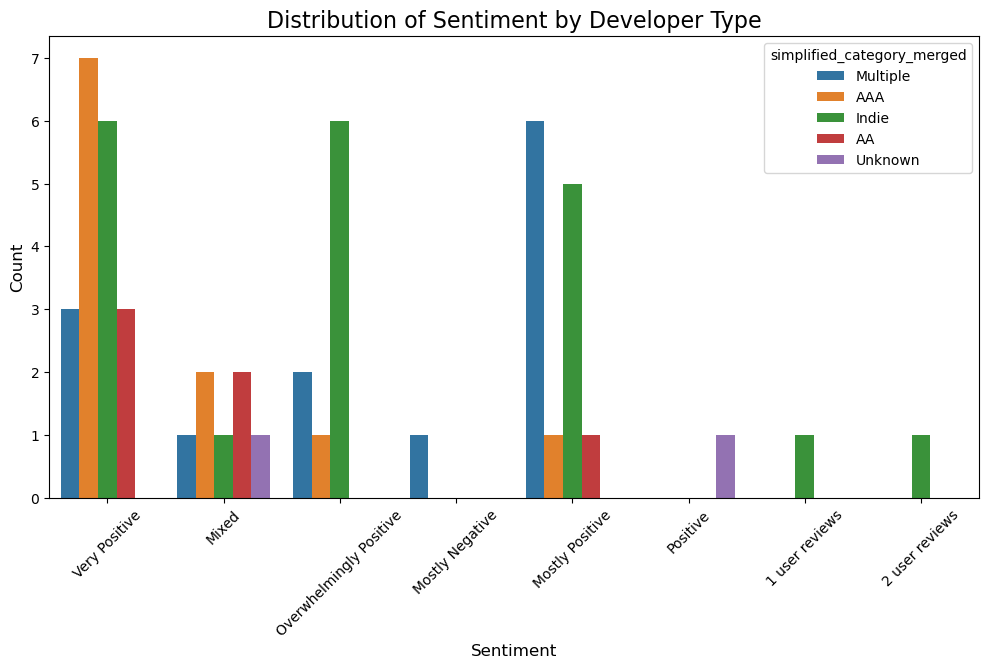

In [21]:
#used Copilot to create visualization
# Create a count plot to visualize the distribution of 'review_score_desc' across 'simplified_category_merged'
plt.figure(figsize=(12, 6))
sns.countplot(data=df_merged_cleaned, x='review_score_desc', hue='simplified_category_merged')

# Set plot title and labels
plt.title('Distribution of Sentiment by Developer Type', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)

# Display the plot
plt.show()